1)
Columns:  Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
Length:  454
Shape:  (454, 7)
Data example:
         Date        Open        High         Low       Close   Adj Close  \
0  2020-12-11  146.550003  151.500000  135.100006  139.250000  139.250000   
1  2020-12-14  135.000000  135.300003  125.160004  130.000000  130.000000   
2  2020-12-15  126.690002  127.599998  121.500000  124.800003  124.800003   
3  2020-12-16  125.830002  142.000000  124.910004  137.990005  137.990005   
4  2020-12-17  143.000000  152.449997  142.669998  147.050003  147.050003   

     Volume  
0  26980800  
1  16966100  
2  10914400  
3  20409600  
4  15054700  

2)
Empty fields:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64
Fields types:
Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: objec

/home/kali/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:684: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.111 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.016 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.078 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.063 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.032 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.095 total time=   0.0s
[CV 1/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.016 total time=   0.0s
[CV 2/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.062 total time=   0.0s
[CV 3/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.079 total time=   0.0s
[CV 4/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.032 total time=   0.0s
[CV 5/5] END ....C=0.1, gamma=0.001, kernel=rbf;, score=0.095 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.016 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma

[CV 2/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.141 total time=   0.0s
[CV 3/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.175 total time=   0.0s
[CV 4/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.079 total time=   0.0s
[CV 5/5] END ...C=1000, gamma=0.001, kernel=rbf;, score=0.159 total time=   0.0s
[CV 1/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.203 total time=   0.0s
[CV 2/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.141 total time=   0.0s
[CV 3/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.159 total time=   0.0s
[CV 4/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.159 total time=   0.0s
[CV 5/5] END ..C=1000, gamma=0.0001, kernel=rbf;, score=0.111 total time=   0.0s
{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=10, gamma=0.1)
Precision:  0.976097050830726

Random Forest:
Predicted:  [107 170 113 171 172  92 156 167 209  97 166 134 152 116 174 114 143 110
 172 143 156 146 114 118 166 143 180  93 181 181 116 174 111 144 169 165
 144 

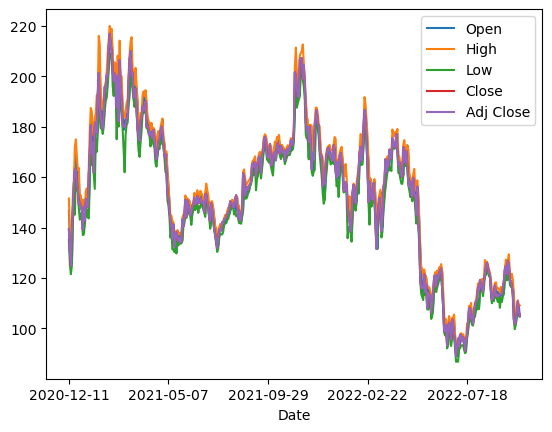

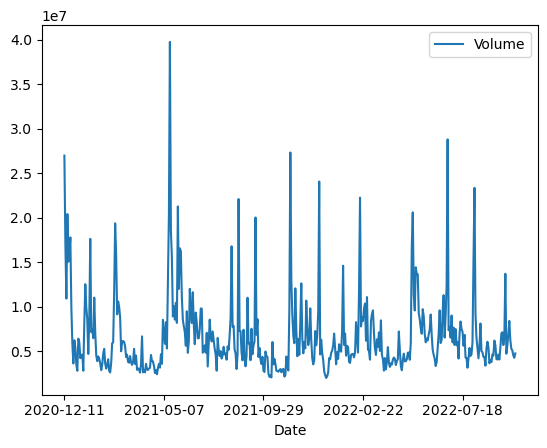

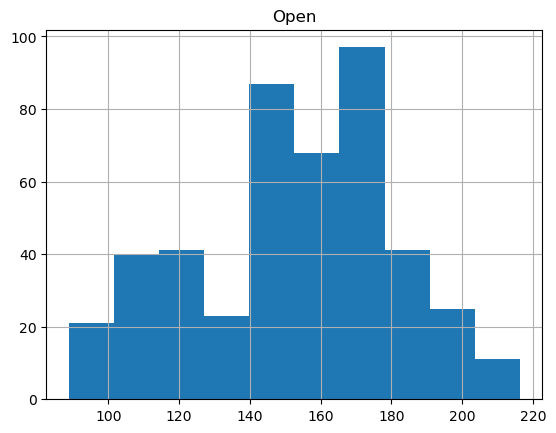

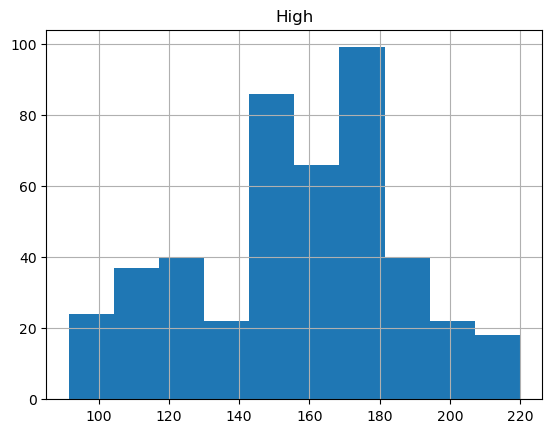

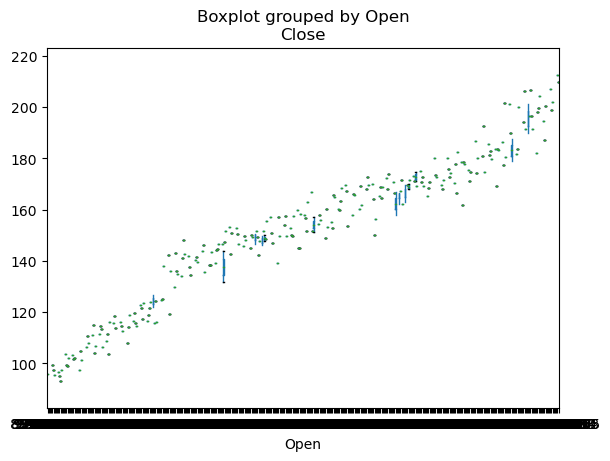

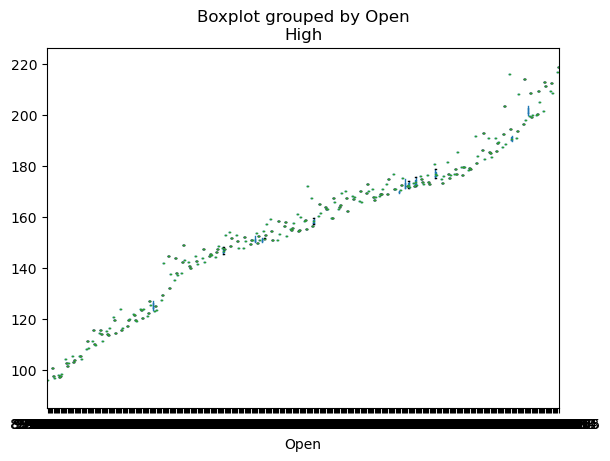

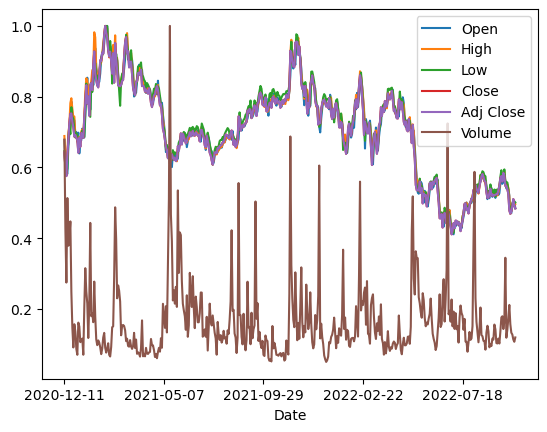

In [6]:
import pandas as pd
import numpy as np
import string
import matplotlib.pyplot as plt
import sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

df = pd.read_csv('ABNB.csv')

def get_precision(pred, test):
    mistake = 0
    for i in range(len(pred)):
        if(pred[i] < test[i]):
            mistake+= pred[i]/test[i]
        else:
            mistake += test[i]/pred[i]
    mistake = mistake/len(pred)
    print("Precision: ", mistake)
        

print("1)")
print("Columns: ", df.columns)
print("Length: ", len(df))
print("Shape: ", df.shape)
print("Data example:")
print(df.head(5))
print()

print("2)")
df.drop_duplicates(inplace = True)
print("Empty fields:")
print(df.isnull().sum())
print("Fields types:")
print(df.dtypes)
print()

print("3)")
df.plot(x="Date", y=["Open", "High", "Low", "Close", "Adj Close"])
df.plot(x="Date", y="Volume")
df.hist("Open")
df.hist("High")
df.boxplot(by ='Open', column =['Close'], grid = False)
df.boxplot(by ='Open', column =['High'], grid = False)
print()

print("4)")
df_norm = df.copy()

for column in df_norm.columns:
    if(column != "Date"):
        df_norm[column] = df_norm[column] / df_norm[column].abs().max()
        
print("Normalized:")
print(df_norm.head(5))
df_norm.plot(x="Date", y=["Open", "High", "Low", "Close", "Adj Close", "Volume"])
print()

print("5)")
df_test = df.copy()
df_test = df_test.drop("Date", axis = 1)
df_test = df_test.drop("Volume", axis = 1)
df_test = df_test.drop("Adj Close", axis = 1)
df_test = df_test.astype({"Open":'int', "High":'int', "Low":'int', "Close":'int'})
X = df_test.iloc[:, [0, 1, 2]].values
y = df_test.iloc[:, 3].values

print("KNN:")
X_train_knn, X_test_knn, y_train_knn, y_test_knn = train_test_split(X, y, test_size=0.3)

graf = []
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train_knn, y_train_knn)
    y_pred_knn = knn.predict(X_test_knn)
    print(i)
    get_precision(y_pred_knn, y_test_knn)
    
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train_knn, y_train_knn)
y_pred_knn = knn.predict(X_test_knn) 
print("Predicted: ", y_pred_knn)
print("Real: ", y_test_knn)
#print(classification_report(y_test_knn, y_pred_knn))
print()

print("Desicion Tree:")
X_train_dt, X_test_dt, y_train_dt, y_test_dt = train_test_split(X, y, test_size=0.3)
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train_dt,y_train_dt)
y_pred_dt = clf_dt.predict(X_test_dt)
print("Predicted: ", y_pred_dt)
print("Real: ", y_test_dt)
get_precision(y_pred_dt, y_test_dt)
#print(classification_report(y_test_dt, y_pred_dt))
print()

print("SVC:")
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X, y, test_size=0.3)
clf_svc = SVC()
clf_svc.fit(X_train_svc,y_train_svc)
y_pred_svc = clf_svc.predict(X_test_svc)
print("Predicted: ", y_pred_svc)
print("Real: ", y_test_svc)
get_precision(y_pred_svc, y_test_svc)

param_grid = {'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],'kernel': ['rbf']} 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
grid.fit(X_train_svc,y_train_svc)
print(grid.best_params_)
print(grid.best_estimator_)
grid_predictions = grid.predict(X_test_svc)
get_precision(grid_predictions, y_test_svc)
print()

print("Random Forest:")
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X, y, test_size=0.3)
clf_rf = RandomForestClassifier(n_estimators=100)
clf_rf.fit(X_train_rf,y_train_rf)
y_pred_rf = clf_rf.predict(X_test_rf)
print("Predicted: ", y_pred_rf)
print("Real: ", y_test_rf)
get_precision(y_pred_rf, y_test_rf)
#print(classification_report(y_test_rf, y_pred_rf))
print()


print("AdaBoost:")
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X, y, test_size=0.3)
abc = AdaBoostClassifier(n_estimators=50, learning_rate=1)
model = abc.fit(X_train_ada, y_train_ada)
y_pred_ada = model.predict(X_test_ada)
print("Predicted: ", y_pred_ada)
print("Real: ", y_test_ada)
get_precision(y_pred_ada, y_test_ada)
#print(classification_report(y_test_ada, y_pred_ada))


